In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
sns.set_style('white')


In [2]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/credit-card-defaults.csv'
).iloc[:,1:].dropna()

In [3]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [4]:
#Convert string to numeric
df['default']= np.where(df['default']=='Yes', 1, 0)
df['student']= np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns = names)

C:\Users\18644\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by the scale function.
  """


In [5]:
df.head()

,default,student,balance,income
0,-0.185599,-0.645936,-0.218835,0.813187
1,-0.185599,1.548141,-0.037616,-1.605496
2,-0.185599,-0.645936,0.492410,-0.131212
3,-0.185599,-0.645936,-0.632893,0.164031
4,-0.185599,-0.645936,-0.102791,0.370915


In [8]:
from sklearn.model_selection import train_test_split
X = df.drop('income', 1)
y= df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 50)

In [20]:
#Let us build a Ridge Regression 

ridgeregr = linear_model.Ridge(alpha =10, fit_intercept=False)
ridgeregr.fit(X_train, y_train)
print('R2 score:',ridgeregr.score(X_test, y_test))

R2 score: 0.5642913262380982


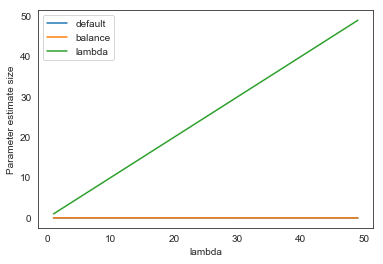

In [15]:
# Store estimates.
estimates = np.append(ridgeregr.coef_, [10])

# Storing legend information.
labels = []

#Run the model for many alphas.
for lambd in range(1, 50, 2):
    ridgeregr = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregr.fit(X_train, y_train)
    estimates = np.row_stack((
        estimates,
        np.append(ridgeregr.coef_,[lambd])))

# Make the data pretty.
estimates_df = pd.DataFrame(
    estimates,
    columns=list(X_train.columns) + ['lambda'])
estimates_df.sort_values(by='lambda', inplace=True, ascending=True)

# Leave out the 'student' variable.
# It has very high values and throws off our plot's scale.
varstoplot = list(estimates_df.columns[:9,])
varstoplot.remove('student')
# Plot a line for each parameter.

for var in varstoplot:
    plt.plot(estimates_df['lambda'], estimates_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size')
plt.legend(labels)
plt.show()

In [22]:
#LASSO Regression
lass = linear_model.Lasso(alpha = 0.35)
lassfit = lass.fit(X_train,y_train)
print("R2 score: ",lass.score(X_test,y_test))

R2 score:  0.450217970752628


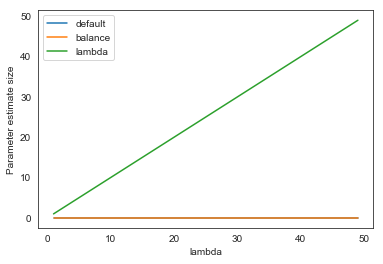

In [13]:
estimates = np.append(lass.coef_,[10])
for lambd in range(1,50,2):
    lass = linear_model.Lasso(alpha=lambd)
    lass.fit(X_train,y_train)
    estimates = np.row_stack((estimates,np.append(lass.coef_,[lambd])))

lass_df = pd.DataFrame(estimates,columns=list(X_train.columns) + ["lambda"])
lass_df.sort_values(by='lambda',inplace=True,ascending=True)

lassplot = list(lass_df.columns[:9,])
lassplot.remove("student")

labels = []
for var in lassplot:
    plt.plot(lass_df["lambda"],lass_df[var])
    labels.append(var)

plt.xlabel('lambda')
plt.ylabel("Parameter estimate size")
plt.legend(labels)
plt.show()